In [2]:
import grequests
import requests as r
from scrapy.selector import Selector

C:\Users\Pritam\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [2]:
urls = ['https://www.zoominfo.com/pic/the-pep-boys/30097622',
    'https://www.google.com/search?&q=California+Auto+Centers+41421+Date+St+STE+104+site:yelp.com&lr=lang_en&hr=en',
    'https://www.google.com/search?q=white+lable+marketing+company+in+florida&num=100&lr=lang_en&hr=en',
    'https://www.google.com/search?q=white%20lable%20marketing%20company&num=100',
    'https://www.google.com/search?q=white%20lable%20marketing%20company&num=100'
] 

In [3]:
header = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
}

In [10]:
rs = (grequests.get(url="https://app.scrapingbee.com/api/v1/",params={"api_key": "6P1GFRI5SPVY4CUI7XH9HGOMP41QSNRHYCIAZAVXINKG7PTHM7U0O79X9MEYIO859P5YT26V56SNVWG4","url":u}) for u in urls)

In [11]:
%%time
data = grequests.map(rs)


Wall time: 3.09 s


In [19]:
grequests.AsyncRequest('GET',url="http://api.scrapestack.com/scrape",params={"access_key": "9fe58ca72866abfe7582941eef8b1aca","url":(grequests.get(u) for u in urls)})

In [12]:
data.







[<Response [429]>,
 <Response [429]>,
 <Response [500]>,
 <Response [429]>,
 <Response [429]>]

In [80]:
response = r.get(url="http://api.scraperapi.com",params={"api_key": "56d242f0d21a0f9744f7feb9a78a3c4b","url":url},)     


NameError: name 'url' is not defined

In [9]:
sel = Selector(text = data[2].content)

In [10]:
link = sel.xpath("//div//a/div[contains(text(),'.')]/text()").extract()

In [11]:
website1 = 'bcpdigitalmarketing.com'

In [12]:
def test():
    for i in range(0, len(link),1):
        if website1[0: website1.index(".")].lower() in link[i]:
            return(f'Page Rank on Google: {i+1}')
    else:
        return('website not top 100 on Query:')

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>California Auto Centers 41421 Date St STE 104 site:yelp.com - Google Search</title><script nonce="KKB3hQxmwoOGFsND3RQrfg==">(function(){window.google={kEI:\'WK9QX9ewLvyHytMP0ZuomAY\',kEXPI:\'31\',kBL:\'yEmH\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var c;a&&(!a.getAttribute||!(c=a.getAttribute("eid")));)a=a.parentNode;return c||google.kEI};google.getLEI=function(a){for(var c=null;a&&(!a.getAttribute||!(c=a.getAttribute("leid")));)a=a.parentNode;return c};google.ml=function(){return null};google.time=function(){return Date.now()};google.log=function(a,c,b,d,g){if(b=google.logUrl(a,c,b,d,g)){a=new Image;var e=google.lc,f=google.li;e[f]=a;a.onerror=a.onload=a.onabort=function(){delete e[
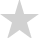
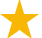
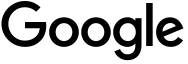

In [13]:
data[1].content

In [14]:
sel = Selector(text = data[1].content)

In [16]:
sel.xpath("//div//a/div[contains(text(),'.')]/text()").extract_first()

In [15]:
rate_review = sel.xpath("//div/g-review-stars/parent::*/text()").extract_first()
rate_review

' Rating: 4.5 - \u200e56 reviews'

In [52]:
print([rate_review.split('-')[0].split(':')[1],rate_review.split('-')[1][2:]])

[' 4,5 ', '56 comentários']


# Google code Cleaner

## List of program that used api

### 1.Year of establishment -2 ..... name,address,
### 2. google rank - 1 ......website, website title
### 3. Crunchbase -1 .....name,address
### 4. Zoominfo - 2    ....name,address
### 5. Yelp listing_url_check-1  ....name,address
### 6. owler api....name,address
### 7. facebook api,name,address,website

In [290]:
name = 'California Automotive and Mobile Mechanics'

In [292]:
address = 'Address: 14254 Oxnard St suite b, Van Nuys, CA 91401, United States '

In [293]:
if name is not None:
    name_for_url = name.replace(' ','+').replace('&','%26').replace("'",'%27')
else:
    name_for_url = None
if address is not None:
    address_for_url=address.replace('Address: ', '').split(',')[0].strip().replace(' ','+')
else:
    address_for_url = None
if website is not None:
    website_for_url=address.replace('Address: ', '').split(',')[0].strip().replace(' ','+')
else:
    website_for_url = None

In [294]:
website = 'Website: carchick.com'

In [299]:
name_for_url

'California+Automotive+and+Mobile+Mechanics'

In [297]:
website_for_url

'14254+Oxnard+St+suite+b'

C:\Users\dashc\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [383]:
link = 'https://www.zoominfo.com/pic/the-pep-boys/30097622'
#link = 'https://google.com/search?q=to+kaise+hai'
#link = "https://www.linkedin.com/in/pranav-vijay-579660bb&premium_proxy=True"

In [385]:
from tqdm import tqdm
data = []
for i in tqdm(range(1,10,1)):
    response = r.get(url="https://app.scrapingbee.com/api/v1/",params={"api_key": "UB375JO1P20SOX1IM0XCFGUIDUZ5CDRNDW3TYHV0DF26X5KMYK8ETKGY07YM2RAJGTG65R0VEV9Y4A2R","url":link})
    print(response)
    #print(response.content)
    print(len(response.content))

 11%|█████████▎                                                                          | 1/9 [00:04<00:37,  4.66s/it]

<Response [200]>
98091


 22%|██████████████████▋                                                                 | 2/9 [00:09<00:33,  4.74s/it]

<Response [200]>
98090


 33%|████████████████████████████                                                        | 3/9 [00:14<00:28,  4.74s/it]

<Response [200]>
98150


 44%|█████████████████████████████████████▎                                              | 4/9 [00:19<00:23,  4.73s/it]

<Response [200]>
98364


 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:23<00:19,  4.80s/it]

<Response [200]>
98149


 67%|████████████████████████████████████████████████████████                            | 6/9 [00:28<00:14,  4.77s/it]

<Response [200]>
98093


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:33<00:09,  4.75s/it]

<Response [200]>
98154


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:38<00:04,  4.76s/it]

<Response [200]>
98082


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:43<00:00,  4.83s/it]

<Response [200]>
98153


In [ ]:
http://api.scrapestack.com/scrape&access_key=9fe58ca72866abfe7582941eef8b1aca&url=https://google.com/search?q=to+kaise+hai

In [1]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is DE4E-DB22

 Directory of C:\Users\dashc

02-09-2020  18:37    <DIR>          .
02-09-2020  18:37    <DIR>          ..
09-06-2020  14:47    <DIR>          .anaconda
09-06-2020  15:02    <DIR>          .astropy
02-09-2020  09:35               680 .bash_history
21-07-2020  12:25    <DIR>          .conda
21-07-2020  12:25                43 .condarc
09-06-2020  15:06    <DIR>          .config
03-07-2020  11:12    <DIR>          .docker
02-09-2020  09:27                58 .gitconfig
02-09-2020  10:22    <DIR>          .ipynb_checkpoints
09-06-2020  15:20    <DIR>          .ipython
13-06-2020  09:21    <DIR>          .jupyter
09-06-2020  15:06    <DIR>          .matplotlib
09-06-2020  14:49    <DIR>          .PyCharm2019.2
07-07-2020  10:51    <DIR>          .pylint.d
07-08-2020  11:50               482 .python_history
04-08-2020  16:25    <DIR>          .ranktracker
04-08-2020  16:25            16,996 .ranktracker.properties
13-08-202

In [17]:
from googlesearch import search

C:\Users\dashc\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [23]:
links = [url for url in  search('white label marketing in florida',stop=10)]

In [24]:
links

['https://floridaseoco.com/white-label/',
 'https://brightgreenpath.com/florida-white-label-web-design-services/',
 'https://mediashark.co/white-label/',
 'https://thewhitelabelcreative.com/',
 'http://digitalvalley.io/white-label-digital-agency-partners',
 'https://www.thatcompany.com/about',
 'https://www.thatcompany.com/',
 'https://clutch.co/agencies/ppc/orlando?page=1',
 'https://department727.com/tampa-white-label-design-services/',
 'https://www.dashclicks.com/',
 'https://www.facebook.com/TheWhiteLabelCreative/',
 'https://www.seoblog.com/best-white-label-seo/',
 'https://www.whitesharkmedia.com/',
 'https://www.dashclicks.com/fulfillment/content-marketing/',
 'https://www.vezadigital.com/post/what-is-a-white-label-agency-how-does-it-work',
 'https://www.bryancaplan.com/white-label-web-services',
 'https://www.linkedin.com/company/dashclicks',
 'https://www.linkedin.com/company/whitelabelclub',
 'https://www.gpspublicrelations.com/white-label-seo-and-online-marketing-services/'

In [ ]:
"https://www.google.com/search?hl=en&q=white+label+marketing+in+florida&btnG=Google+Search&cr=usa"